
# import lib

In [1]:
import json
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

def jaccard_similarity(a, b):
    a = set(a.split(" "))
    b = set(b.split(" "))
    j = float(len(a.intersection(b))) / len(a.union(b))
    return j

In [2]:
item_data = pd.read_pickle("item_data.pkl")
item_data

,item_id,shopid,item_name,item_price,item_rating,item_sold,cat_0,cat_1,cat_2,cat_3,item_ctime,item_brand_id,item_comment_count
0,4526109215,169520757,de khan robot ecovacs deebot ozmo 600 hang ch...,1500,5.000000,5,100010,100038,100177,0,1586505438,1801062,1
1,3673424387,326323525,noi nau cham cach thuy 08l bear sube001 ban q...,4500,4.857143,175,100010,100041,100206,0,1609827461,1247566,57
2,7392791903,136097133,noi com dien tu zojirushi 1 lit nsysq10xj han...,51990,5.000000,4,100010,100041,100207,0,1624596455,1802993,1
3,4496895370,264995867,may loc khong khi max air ma025 va 2 mang loc ...,19980,5.000000,2,100010,100038,100176,100458,1628331085,1250659,1
4,13052311517,65589552,luu sam3 giam 300k elsamhot giam 5 smart tivi...,240600,5.000000,10,100010,100040,100185,0,1637221639,1695294,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564,12771696200,597699842,tai nghe gaming bluetooth hosan flydigi cyberf...,13590,0.000000,0,100535,100578,0,0,1642561258,2313207,0
3565,5453943609,95303264,may nang co lg pral total lift up,90000,5.000000,28,100630,100663,100886,101663,1600845862,1255919,6
3566,13817642232,88201679,apple iphone 13 pro max 128gb,294900,4.895522,1052,100013,100073,0,0,1632744702,1189223,205
3567,7159085799,77877479,dau doc the nho hoco 2 trong 1 cong usb 30 us...,380,4.937500,230,100644,101940,101987,0,1603627153,0,64


pick random item as input

In [3]:
item_random = item_data.loc[[ np.random.randint(0,len(item_data),1)[0]]]
print("https://shopee.vn/-cLHC4151-i."+str(item_random["shopid"].values[0])+"."+str(item_random["item_id"].values[0]))
item_random

https://shopee.vn/-cLHC4151-i.323441691.11882024470


,item_id,shopid,item_name,item_price,item_rating,item_sold,cat_0,cat_1,cat_2,cat_3,item_ctime,item_brand_id,item_comment_count
2408,11882024470,323441691,tai nghe bluetooth chup tai overear jbl live 5...,35900,0.0,0,100535,100578,0,0,1641702499,1146612,0


## filter item

filter item with the same category and different shop

In [4]:
item_recommendation = item_data[
  (item_data['cat_2'] == item_random['cat_2'].values[0])
& (item_data['shopid'] != item_random['shopid'].values[0])
]
item_recommendation

,item_id,shopid,item_name,item_price,item_rating,item_sold,cat_0,cat_1,cat_2,cat_3,item_ctime,item_brand_id,item_comment_count
20,9480485295,492683372,tai nghe sennheiser hd 350bt,32990,0.000000,0,100535,100578,0,0,1626774340,1695336,0
34,11603238727,441656386,tai nghe blutooth nhet tai dkb tw16 cam ung v...,3590,5.000000,1,100535,100578,0,0,1620726923,1255436,1
36,10178910254,628049927,ma bmbau50 giam 50k don 150k tai nghe true wir...,7900,5.000000,30,100535,100578,0,0,1640168583,2451062,8
43,11153345661,88201679,apple iphone 13 256gb,241900,4.921569,305,100013,100073,0,0,1632744633,1189223,102
63,8407312736,65589552,ma elsamhot giam 5 don 3tr dien thoai samsung ...,35900,4.894081,2968,100013,100073,0,0,1609831662,1695294,963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552,10227231581,457378832,tai nghe chong on co mic ziyou ck8 co day ful...,790,0.000000,0,100535,100578,0,0,1628843799,2388765,0
3555,5600084939,88201679,apple iphone 11 64gb,132900,4.861715,5369,100013,100073,0,0,1570164420,1189223,1678
3556,10249673764,518561065,tai nghe bluetooth tribit xfree go bluetooth ...,12500,5.000000,18,100535,100578,0,0,1631842215,1191666,5
3564,12771696200,597699842,tai nghe gaming bluetooth hosan flydigi cyberf...,13590,0.000000,0,100535,100578,0,0,1642561258,2313207,0


## create data variables when comparing input with other items

price_diff = different price between input and other

jaccard_name = jaccard metric between input name and other name

ctime_diff = the time the product is available in the shop


In [5]:
time_now = int(time.time())
scaler = MinMaxScaler()

item_recommendation["price_diff"] = item_recommendation['item_price'].apply(lambda x: abs(x - item_random['item_price'].values[0]))
item_recommendation["jaccard_name"] = item_recommendation['item_name'].apply(lambda x: jaccard_similarity(item_random['item_name'].values[0],x) )
item_recommendation["ctime_diff"] = item_recommendation['item_ctime'].apply(lambda x: time_now - x)


item_x = item_recommendation.drop(["item_brand_id","item_ctime",'item_price','cat_0','cat_1','cat_2','cat_3'], axis = 1)
item_x[['item_rating','item_sold','item_comment_count','price_diff','jaccard_name','ctime_diff']] = scaler.fit_transform(item_x[['item_rating','item_sold','item_comment_count','price_diff','jaccard_name','ctime_diff']])
item_x

,item_id,shopid,item_name,item_rating,item_sold,item_comment_count,price_diff,jaccard_name,ctime_diff
20,9480485295,492683372,tai nghe sennheiser hd 350bt,0.000000,0.000000,0.000000,0.005950,0.244898,0.152303
34,11603238727,441656386,tai nghe blutooth nhet tai dkb tw16 cam ung v...,1.000000,0.000080,0.000216,0.066060,0.205714,0.208142
36,10178910254,628049927,ma bmbau50 giam 50k don 150k tai nghe true wir...,1.000000,0.002393,0.001724,0.057248,0.214286,0.028628
43,11153345661,88201679,apple iphone 13 256gb,0.984314,0.024328,0.021983,0.421182,0.000000,0.097177
63,8407312736,65589552,ma elsamhot giam 5 don 3tr dien thoai samsung ...,0.978816,0.236739,0.207543,0.000000,0.223602,0.308744
...,...,...,...,...,...,...,...,...,...
3552,10227231581,457378832,tai nghe chong on co mic ziyou ck8 co day ful...,0.000000,0.000000,0.000000,0.071785,0.183673,0.133195
3555,5600084939,88201679,apple iphone 11 64gb,0.972343,0.428252,0.361638,0.198323,0.114286,0.675012
3556,10249673764,518561065,tai nghe bluetooth tribit xfree go bluetooth ...,1.000000,0.001436,0.001078,0.047843,0.253968,0.105509
3564,12771696200,597699842,tai nghe gaming bluetooth hosan flydigi cyberf...,0.000000,0.000000,0.000000,0.045614,0.233766,0.006535


## Calculate the score of item

Choose from the following fields ['item_rating','item_sold',
                                    'item_comment_count',
                                    'price_diff','jaccard_name',
                                    'ctime_diff']
                                    
=> min max scaling 

### set weight for each data variable

If the data variable is more important, the absolute value of that variable will be larger

If the data variable has a negative meaning, then the variable will be negative

    [2],  # item_rating
    
    [1],  # item_sold
    
    [1],  # item_comment_count
    
    [-3], # price_diff
    
    [7], # jaccard_name
    
    [-2] # ctime_diff
    
multiply all variable with weight

and minmax scaling again

In [6]:
m1 = np.array(item_x[['item_rating','item_sold','item_comment_count','price_diff','jaccard_name','ctime_diff']])
m2 = np.array([
    [2],  # item_rating
    [1],  # item_sold
    [1],  # item_comment_count
    [-3], # price_diff
    [7], # jaccard_name
    [-2]] # ctime_diff
)
m3 = np.dot(m1,m2)
m3 = m3.reshape(m3.shape[0],)

item_x["score"] = m3
item_x = item_x.sort_values(by="score",ascending=False)[:50]
item_x = item_x.drop(['item_name','item_rating',
                      'item_sold','item_comment_count',
                      'price_diff','jaccard_name',
                      'ctime_diff'], axis = 1)
item_x

,item_id,shopid,score
1250,9037506906,397705144,8.242650
3111,6118101410,95701859,7.196337
3122,5418101473,95701859,6.704351
2287,5718101482,95701859,6.699316
1084,9310935432,65589552,6.362328
207,6835126792,95701859,6.344493
2341,5718101441,95701859,6.181360
1753,9228540185,394941304,6.149667
1832,9227255809,94123517,6.112258
1964,6635152112,95701859,6.055917


## join item_x with shop_data to get shop information

In [7]:
shop_score = pd.read_pickle("shop_data.pkl")
item_x = item_x.merge(shop_score, on='shopid', how='left')
item_x

,item_id,shopid,score,shop_slug,shop_score
0,9037506906,397705144,8.242650,jbl_official_store,0.459799
1,6118101410,95701859,7.196337,soundmax_official_store,0.462190
2,5418101473,95701859,6.704351,soundmax_official_store,0.462190
3,5718101482,95701859,6.699316,soundmax_official_store,0.462190
4,9310935432,65589552,6.362328,samsung_official_store,0.670885
5,6835126792,95701859,6.344493,soundmax_official_store,0.462190
6,5718101441,95701859,6.181360,soundmax_official_store,0.462190
7,9228540185,394941304,6.149667,earldom.store,0.595976
8,9227255809,94123517,6.112258,philips_official_store,0.463278
9,6635152112,95701859,6.055917,soundmax_official_store,0.462190


## The ordinal importance of the shop will be depicted by an exponential graph

Accordingly, the products in the first order will have a higher coefficient, the later the coefficient will decrease

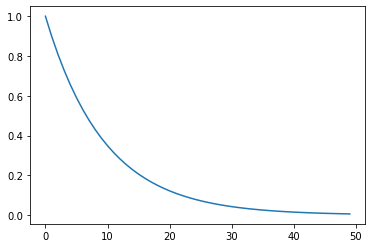

In [8]:
x = np.arange(0,50)
y = np.power(0.9, x)
plt.plot(x, y)

multiply shop_score with weight

In [287]:
item_x["weight"] = y
item_x["shop_score_weight"] = item_x["shop_score"] * item_x["weight"]
item_x

,item_id,shopid,score,shop_slug,shop_score,weight,shop_score_weight
0,9767005868,20009052,8.771895,mrhahoanganh,0.490841,1.000000,0.490841
1,7157931352,53621981,7.366751,comet_homeappliances,0.521813,0.900000,0.469631
2,2710730652,11721690,7.213984,bsmartvn,0.484668,0.810000,0.392581
3,7633244755,53621981,7.053715,comet_homeappliances,0.521813,0.729000,0.380401
4,4633473495,153476815,7.027532,greenbox.official,0.481634,0.656100,0.316000
5,4604280919,153476815,6.979182,greenbox.official,0.481634,0.590490,0.284400
6,619113502,34896130,6.571705,kynguyen024,0.552493,0.531441,0.293617
7,3465928321,254657873,6.440874,tefal_vn_official,0.612906,0.478297,0.293151
8,619113405,34896130,6.404354,kynguyen024,0.552493,0.430467,0.237830
9,6142350625,284593651,6.295328,philips_homeappliances,0.538177,0.387420,0.208501


In [288]:
shop_recommendation = item_x.groupby(['shop_slug'])['shop_score_weight'].agg('sum').reset_index()
shop_recommendation = shop_recommendation.sort_values(by="shop_score_weight",ascending=False)
shop_recommendation

,shop_slug,shop_score_weight
5,greenbox.official,0.990656
2,comet_homeappliances,0.907815
6,kynguyen024,0.715858
10,mrhahoanganh,0.576031
1,bsmartvn,0.403500
14,tefal_vn_official,0.342040
3,electrolux_official_store,0.278753
13,philips_homeappliances,0.225132
11,nagakawa_official_store,0.187673
0,bluestone_vietnam,0.184130
